## Test 10

This test is built to test the basic heterosynaptic framework works as intended in the original version. We replicate the behaviour of STDP when increasing alpha and beta parameters in the weight spread varying A. The test results do not coincide perfectly with Saif's results, even with the parameters and theoretical frame being identical. It is true that the code I (Antoni) adapted a different version of Saif's code. I have tried to make it work, but I do not accomplish the same smoothness in the figures, or the same rough values in the weight spreads. The figures this test replicates are supposed to be Figures 3.9 and 3.10 from his masters thesis

### IMPORTANT

Put the ten generated folders from the simulation's iteration in the same folder as this notebook. The five folders' data is necessary for this analysis to replicate the figure.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def order_files(data_files):
    pack1=[]
    pack2=[]
    for file in data_files:
        if "alpha_ltp_0.1" in file:
            pack1.append(file)
        else:
            pack2.append(file)
    return pack1 + pack2

In [3]:
folders=[]
data_files=[]
for folder in os.listdir():
    if folder.startswith("Test10_HSF_i1"):
        #folder=os.path.join("./",folder)
        folders.append(folder)
        for file in os.listdir(folder):
            if file.endswith("OverallHS.dat"):
                file=os.path.join(folder, file)
                data_files.append(file)
df = pd.read_csv(data_files[0], sep='\t', header=0, skiprows=5, comment="#")
df=df.iloc[:,0:1]
data_files=order_files(data_files)
i=0
for file in data_files:
    i+=1
    df_temp = pd.read_csv(file, sep='\t', header=0, skiprows=5, comment="#")
    df[i]=df_temp.iloc[:,1]
df.columns=['time', 'it1ALTD 0.2','it1ALTD 0.235','it1ALTD 0.275','it1ALTD 0.305','it1ALTD 0.325', 'it2ALTD 0.2','it2ALTD 0.235','it2ALTD 0.275','it2ALTD 0.305','it2ALTD 0.325']

(0.9, 1.35)

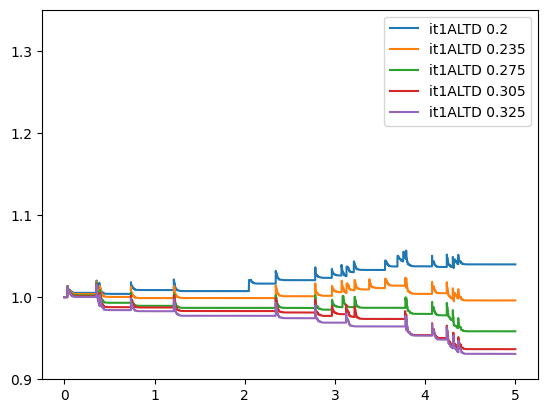

In [4]:
plt.plot(df.iloc[:,0],df.iloc[:,1:6], label=df.columns[1:6])
plt.legend()
plt.ylim(0.9, 1.35)

(0.9, 1.35)

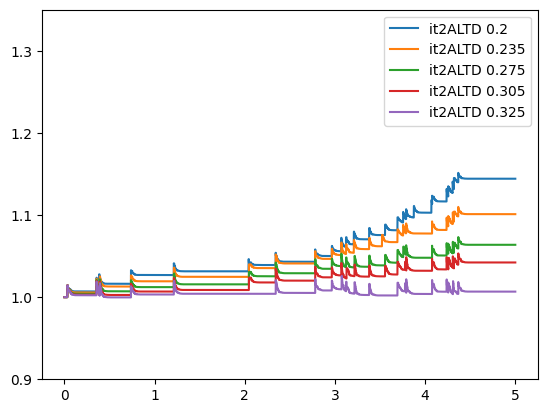

In [5]:
plt.plot(df.iloc[:,0],df.iloc[:,6:11], label=df.columns[6:11])
plt.legend()
plt.ylim(0.9, 1.35)

The two figures are supposed to present a spread of mean weights. The increase of alpha and beta by tenfold makes the model more susceptible to cooperativity (theta) and thus bias a greater LTP.

### What we want to replicate

## Figure 3.9
![Alt text](Figure3.9.png)

## Figure 3.10 
(Parameters are not identical, but the evaulated effect should be the same)

![Alt text](Figure3.10.png)